# Test of `prop_magnify` function


In [3]:
import numpy as np

toliman_settings = {
                    # Eduardo's values:
                    'diam': 0.001 * 2. * 150, 
                    'm1_fl': 0.5717255, 
                    'm1_m2_sep': 0.54933763033373, 
                    'm2_fl': -0.02337895948640,  
                    'bfl': 0.52761,# Adjusted value to get proper focus (from BN)
                    'm2_rad': 0.00590401477581,
                    'm1_conic': -1.00011470000000,
                    'm2_conic': -1.16799179177759,
                    # Go for 5-fold symmetry to match assumed rosette
                    'm2_strut_width': 0.01,
                    'm2_supports': 5,
                    # Some other defaults
                    'beam_ratio': 0.2,
                    'tilt_x': 0.,
                    'tilt_y': 0.
                    }

wavelength = 0.6 # 600 nm
gridsize = 2048

In [5]:
# Generate PSF (amplitude) to be resized
import proper

settings = toliman_settings.copy()
settings['noabs'] = True
(wavefront, sampling) = proper.prop_run('prescription_rc_conic', wavelength, gridsize = gridsize, QUIET=True, PRINT_INTENSITY=False, PASSVALUE=settings)

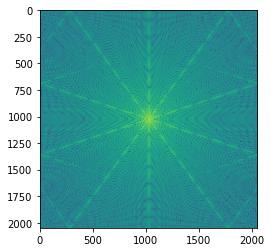

In [17]:
# Show log intensity
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#c = int(gridsize/2)
#hw = 80
#plt.imshow(np.log10(np.abs(wavefront[c-hw:c+hw, c-hw:c+hw])**2), interpolation = 'none', cmap='viridis')
plt.imshow(np.log10(np.abs(wavefront)**2), interpolation = 'none', cmap='viridis')
plt.show()

In [19]:
detector_pitch = 11.0e-6 # m/pixel
npixels = 512 # On detector
npsf = npixels*2
common_sampling = detector_pitch/2. # for Nyquist 

# Resample and weight
mag = sampling / common_sampling
print("Rescaling from sampling of {} to {}, magnification of {}, for grid of size {} pixels".format(sampling, common_sampling, mag, npsf))
magnified = proper.prop_magnify(wavefront, mag, npsf, CONSERVE = True)


Rescaling from sampling of 5.3945616055901824e-06 to 5.5e-06, magnification of 0.9808293828345787, for grid of size 1024 pixels


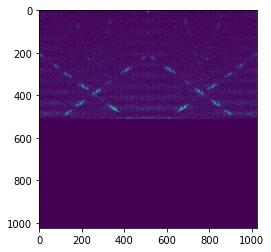

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(np.abs(magnified), interpolation = 'none', cmap='viridis')
plt.show()